## Evaluation of BOSS Spectra Meta Data

This notebook takes a look at the distribution of metadata and can be used to cross check the metadata compiled in boss_meta_rich.pkl created using boss_meta_rich.py

In [82]:
%matplotlib inline
import pickle 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import EarthLocation
from astropy.time import Time

In [8]:
meta_rich_file = 'boss_rich_meta.pkl'
meta_rich = pickle.load(open(meta_rich_file, 'rb'))

In [18]:
meta_rich_data = []
for plate in meta_rich:
    for line in plate:
        meta_rich_data.append(line)

In [19]:
meta_df = pd.DataFrame(meta_rich_data, columns = ['PLATE','image','TAI_beg','TAI_end','RA','DEC','Airmass','Alt','Exptime','moon_lat','moon_lon', 'sun_lat', 'sun_lon', 'moon_alt', 'moon_az', 'sun_alt', 'sun_az', 'days_to_full', 'ecl_lat', 'ecl_lon', 'gal_lat', 'gal_lon', 'az', 'fli', 'solar_flux'])

In [41]:
meta_df = meta_df.apply(lambda x: pd.to_numeric(x, errors='ignore'))

### Identify "GOOD" Data

In [21]:
#This txt file contains all the good plate-days
GOOD_FILE = '/global/homes/p/parkerf/BOSS_Sky/good_plates.txt' 

In [22]:
#Pull info from this file and only use critical info
good_data = pd.DataFrame.from_csv(GOOD_FILE, index_col=None, header=0)
good_info = good_data[['MJD','QUALITY','PLATE']]

In [23]:
#Need to calculate the MJD of each observation to compare with the plate-day

#location and time
APACHE = EarthLocation(lat=(32+4.6/60+49.30/3600), lon=(-105+49./60+13.50/3600.), height=2788)
def mjd_time(fits_time):
    fits_time = float(fits_time)
    tt = Time(fits_time/86400, scale='tai', format='mjd', location=APACHE)
    return tt.mjd

In [42]:
meta_df['TAI_MJD'] = meta_df.TAI_beg.apply(mjd_time)
meta_df['MJD'] = np.round(meta_df.TAI_MJD)

In [43]:
good_obs = pd.merge(meta_df,good_info,on=['MJD','PLATE'],how='left')
good_meta_df = good_obs[good_obs.QUALITY == 'good']

## Cross Check Data

In [76]:
pd.set_option('display.max_columns', None)

In [77]:
#INPUTS:
ra = 7.947569
dec = 19.996900

In [79]:
xcheck_data = meta_df[(meta_df.RA == ra) & (meta_df.DEC == dec)]

In [80]:
xcheck_data

,PLATE,image,TAI_beg,TAI_end,RA,DEC,Airmass,Alt,Exptime,moon_lat,moon_lon,sun_lat,sun_lon,moon_alt,moon_az,sun_alt,sun_az,days_to_full,ecl_lat,ecl_lon,gal_lat,gal_lon,az,fli,solar_flux,TAI_MJD,MJD
0,6187.0,150697.0,4.859499e+09,4.859500e+09,7.947569,19.9969,1.04618,74.229,900.86,-0.021724,346.079314,-0.012297,280.691831,-66.381447,308.174232,-59.208749,291.117269,15.41596,15.19384,15.333151,-42.63518,116.652896,219.012584,0.29176,145.766667,56244.199687,56244.0


## Distribution of Data

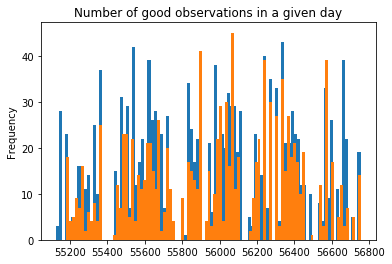

In [83]:
meta_df.MJD.plot.hist(bins=100)
good_meta_df.MJD.plot.hist(bins=100)
plt.title("Number of good observations in a given day")

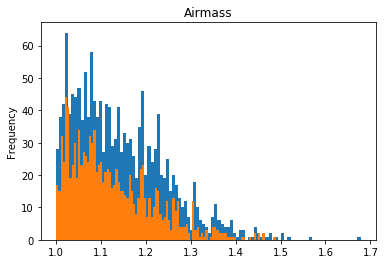

In [84]:
meta_df.Airmass.plot.hist(bins=100)
good_meta_df.Airmass.plot.hist(bins=100)
plt.title('Airmass')

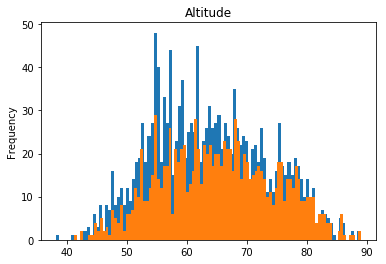

In [85]:
meta_df.Alt.plot.hist(bins=100)
good_meta_df.Alt.plot.hist(bins=100)
plt.title('Altitude')

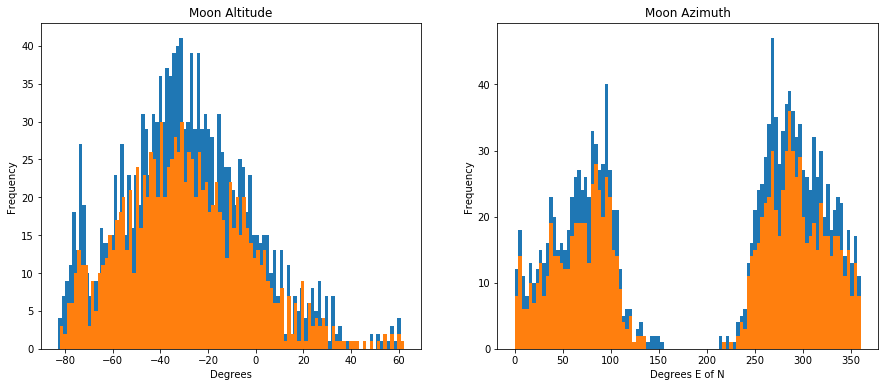

In [91]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
meta_df.moon_alt.plot.hist(bins=100)
good_meta_df.moon_alt.plot.hist(bins=100)
plt.title('Moon Altitude')
plt.xlabel('Degrees')
plt.subplot(1,2,2)
meta_df.moon_az.plot.hist(bins=100)
good_meta_df.moon_az.plot.hist(bins=100)
plt.title('Moon Azimuth')
plt.xlabel('Degrees E of N')

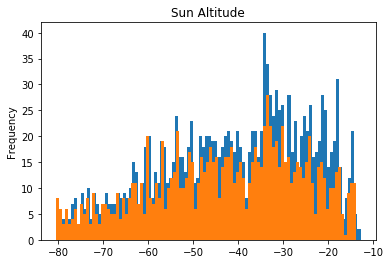

In [92]:
meta_df.sun_alt.plot.hist(bins=100)
good_meta_df.sun_alt.plot.hist(bins=100)
plt.title('Sun Altitude')

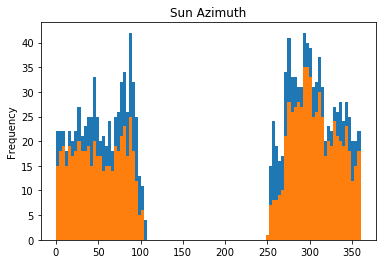

In [93]:
meta_df.sun_az.plot.hist(bins=100)
good_meta_df.sun_az.plot.hist(bins=100)
plt.title('Sun Azimuth')

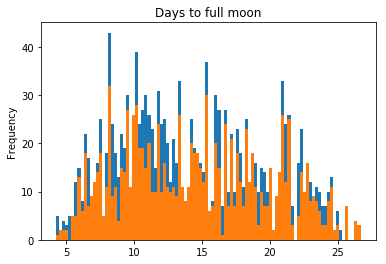

In [94]:
meta_df.days_to_full.plot.hist(bins=100)
good_meta_df.days_to_full.plot.hist(bins=100)
plt.title('Days to full moon')

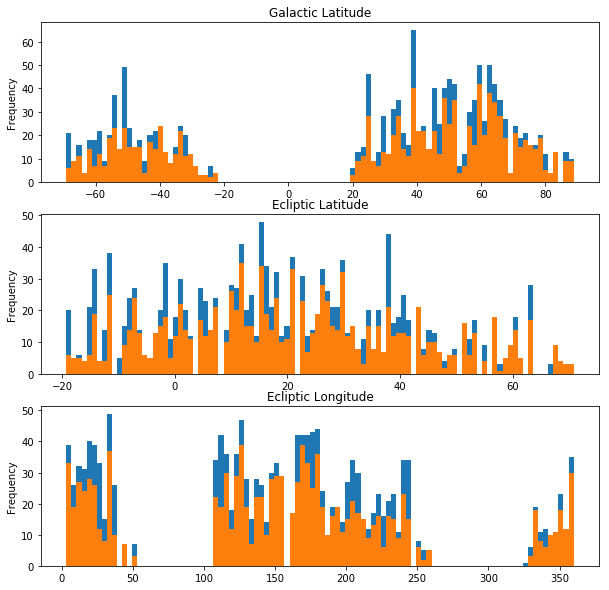

In [96]:
plt.figure(figsize=[10,10])
plt.subplot(3,1,1)
meta_df.gal_lat.plot.hist(bins=100)
good_meta_df.gal_lat.plot.hist(bins=100)
plt.title('Galactic Latitude')
plt.subplot(3,1,2)
meta_df.ecl_lat.plot.hist(bins=100)
good_meta_df.ecl_lat.plot.hist(bins=100)
plt.title('Ecliptic Latitude')
plt.subplot(3,1,3)
meta_df.ecl_lon.plot.hist(bins=100)
good_meta_df.ecl_lon.plot.hist(bins=100)
plt.title('Ecliptic Longitude')

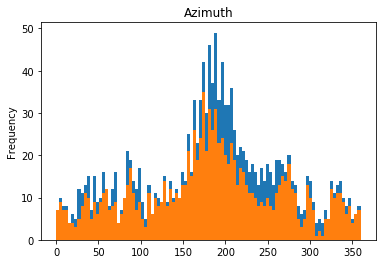

In [98]:
meta_df.az.plot.hist(bins=100)
good_meta_df.az.plot.hist(bins=100)
plt.title('Azimuth')

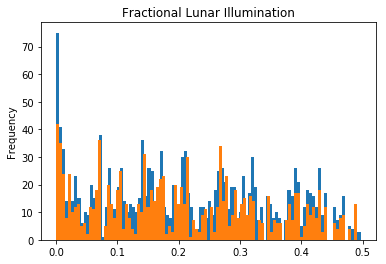

In [99]:
meta_df.fli.plot.hist(bins=100)
good_meta_df.fli.plot.hist(bins=100)
plt.title('Fractional Lunar Illumination')

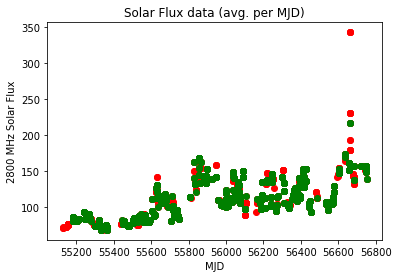

In [102]:
plt.plot(meta_df.MJD,meta_df.solar_flux,'ro')
plt.plot(good_meta_df.MJD,good_meta_df.solar_flux,'go')
plt.title("Solar Flux data (avg. per MJD)")
plt.xlabel("MJD")
plt.ylabel("2800 MHz Solar Flux")